# Predictor del índice de felicidad basado en datos del 2015

## Pre-procesamiento

In [110]:
# Importar las librerías necesarias
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


df = pd.read_csv("data_parte_2/2015.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Revisar información básica del dataset

In [111]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [112]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Comprobando valores nulos

In [113]:
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


### Seleccion de las características y la variable objetivo

In [114]:
df['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [82]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

### Datos categóricos

In [116]:
df_with_region_as_cat = df.copy()

In [117]:
X = pd.Categorical(df_with_region_as_cat['Region'])
df_with_region_as_cat['Region'] = X.codes

print(X.codes)
print(X.categories)

[9 9 9 9 5 9 9 9 0 0 4 3 9 3 5 3 9 9 9 4 9 4 3 6 3 9 3 4 9 3 1 3 3 6 4 9 9
 2 4 3 3 3 3 1 1 2 2 3 4 9 3 1 3 1 1 1 3 3 1 1 6 1 4 1 3 9 9 4 1 1 8 2 1 6
 6 4 1 8 7 1 7 4 1 2 8 1 1 9 1 6 8 4 1 8 1 1 8 3 6 2 8 9 4 1 3 1 4 4 7 4 1
 4 8 8 8 8 7 8 3 8 7 8 8 8 8 8 1 8 6 1 8 7 8 1 4 4 8 8 8 8 8 8 8 8 6 8 8 8
 8 8 8 8 7 8 8 4 8 8]
Index(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object')


In [118]:
df_with_region_as_cat

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [119]:
df_with_region_as_cat = df_with_region_as_cat.drop(['Country'], axis=1)
df_with_region_as_cat = df_with_region_as_cat.drop(['Happiness Rank'], axis=1)

### Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

In [122]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_with_region_as_cat, test_size=0.2, random_state=42)

In [123]:
train_set.shape

(126, 10)

In [124]:
test_set.shape

(32, 10)

## Análisis Exploratorio

### Visualizaciones, descripciones y detecciones de valores atípicos

In [125]:
train_set.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,5.087302,5.392992,0.047002,0.872466,0.990109,0.641581,0.430958,0.138440,0.233889,2.085560
std,3.014684,1.132252,0.017294,0.392025,0.280103,0.238639,0.150476,0.123665,0.122996,0.559713
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.047760,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.566500,0.036200,0.607043,0.861422,0.514818,0.332072,0.058560,0.144495,1.767475
50%,4.500000,5.260500,0.043640,0.919550,1.028915,0.705930,0.429810,0.104525,0.216130,2.107080
75%,8.000000,6.158500,0.050915,1.166660,1.218783,0.814142,0.553770,0.158273,0.316592,2.453238
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.576300,3.602140


[]

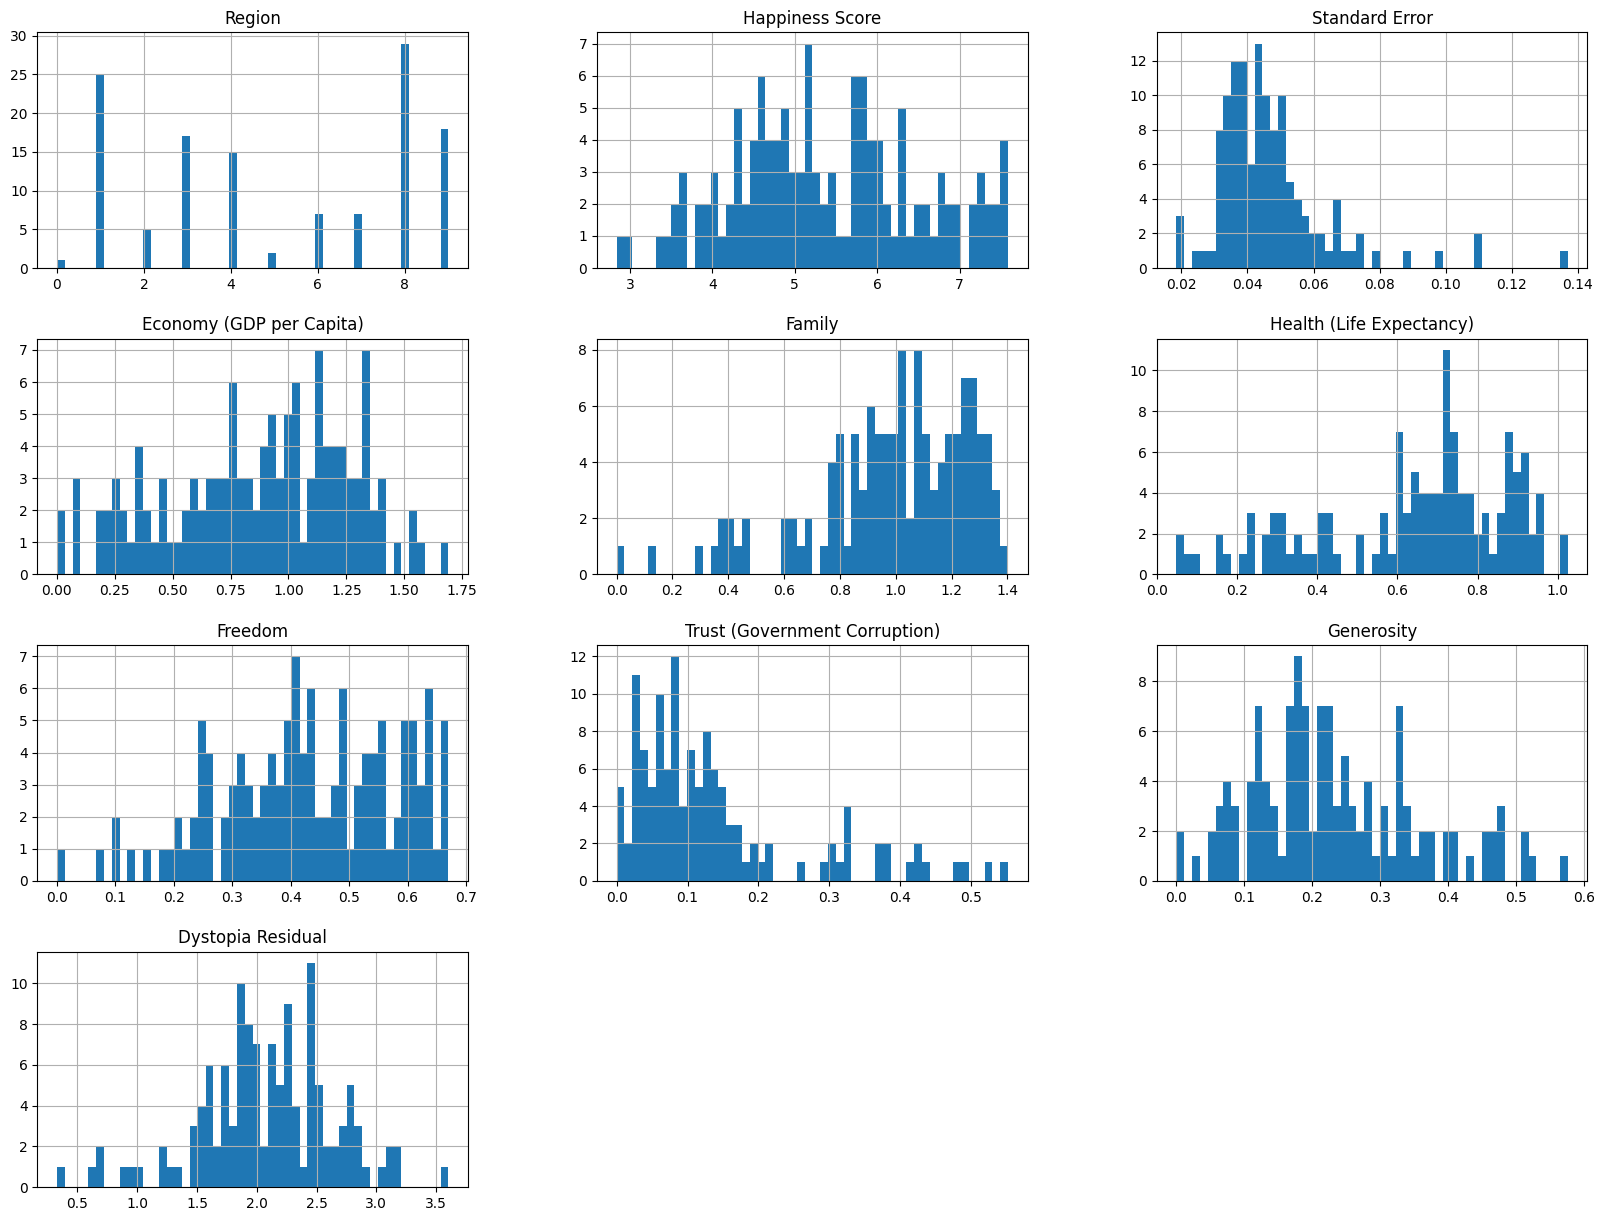

In [126]:
train_set.hist(bins=50, figsize=(20,15))
plt.plot()

In [127]:
train_set.columns

Index(['Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

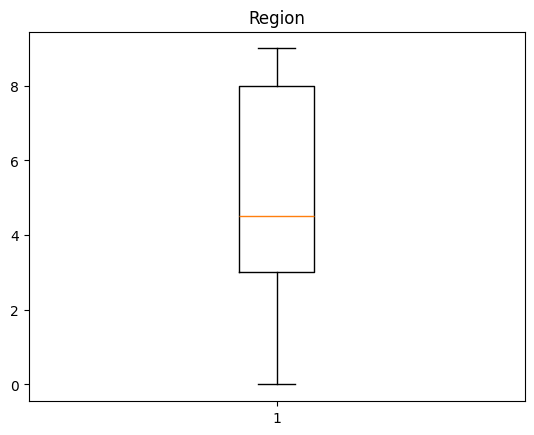

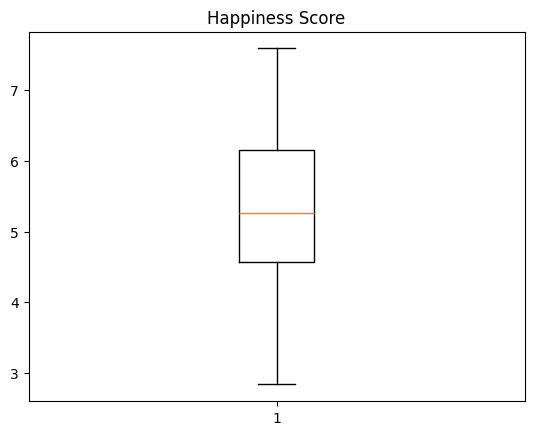

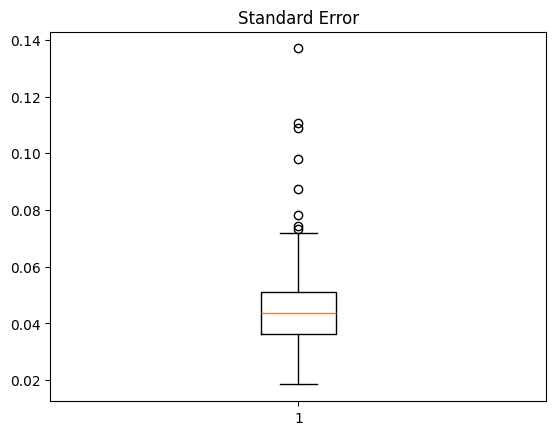

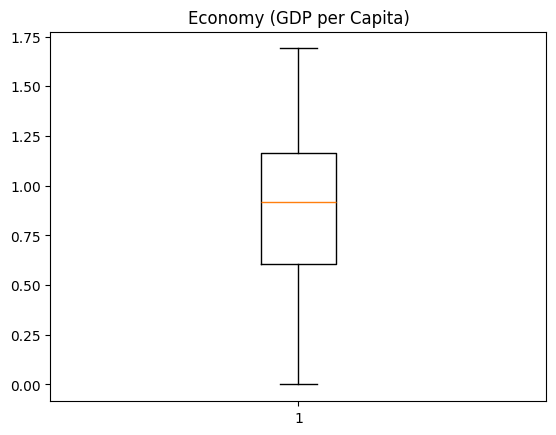

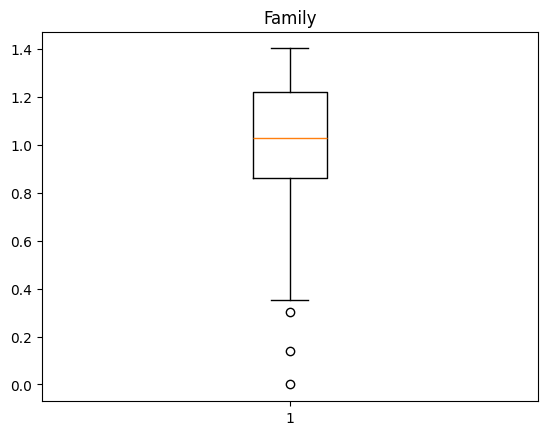

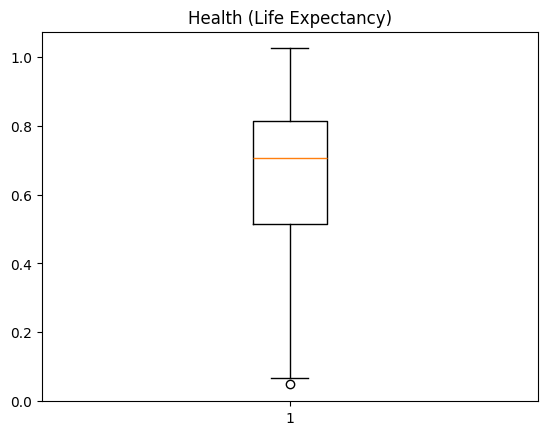

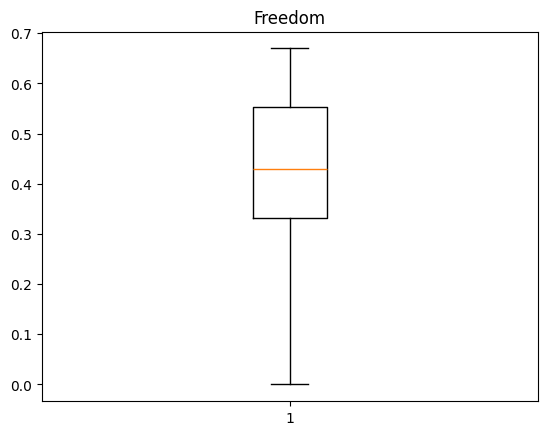

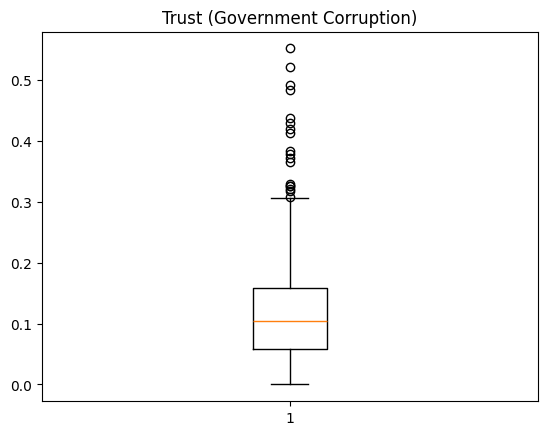

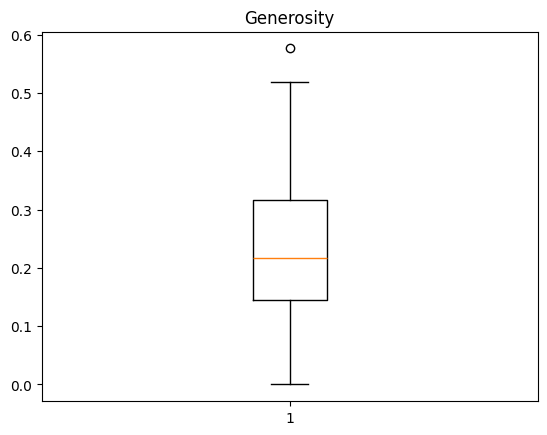

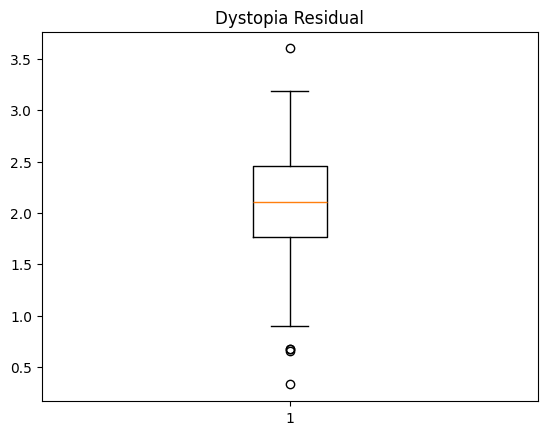

In [128]:
for i in train_set.columns:
  plt.boxplot(train_set[i])
  plt.title(i)
  plt.show()

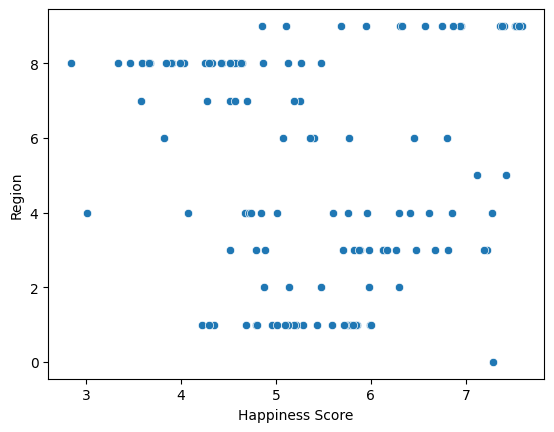

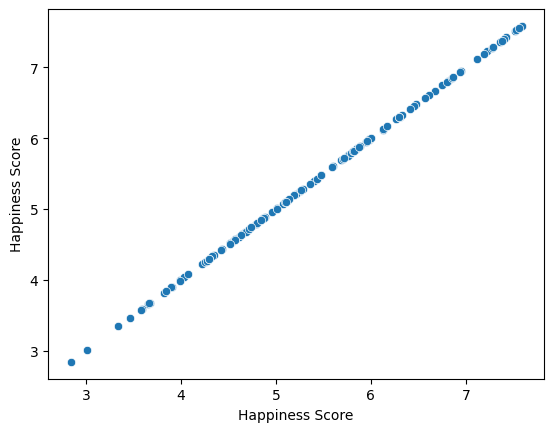

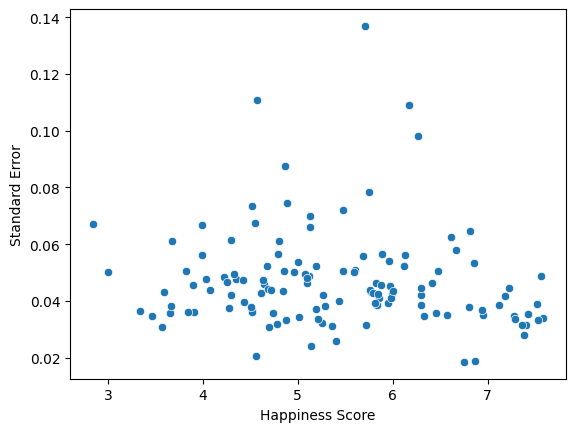

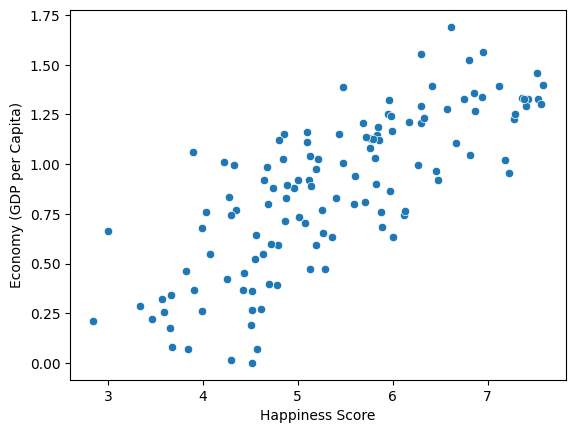

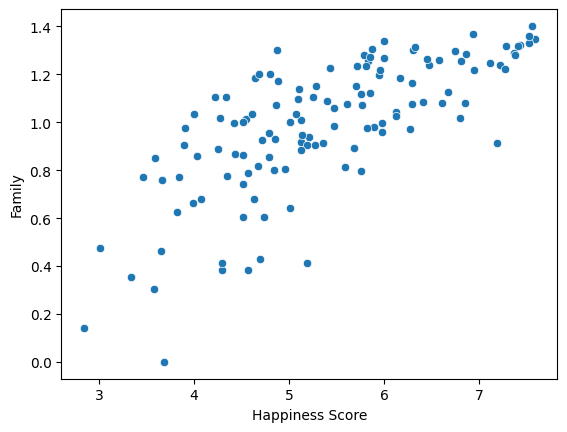

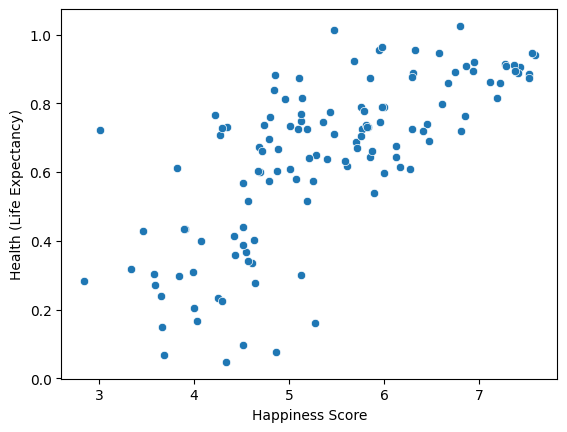

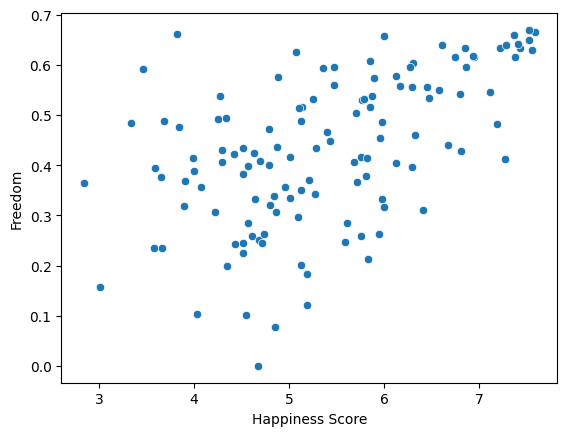

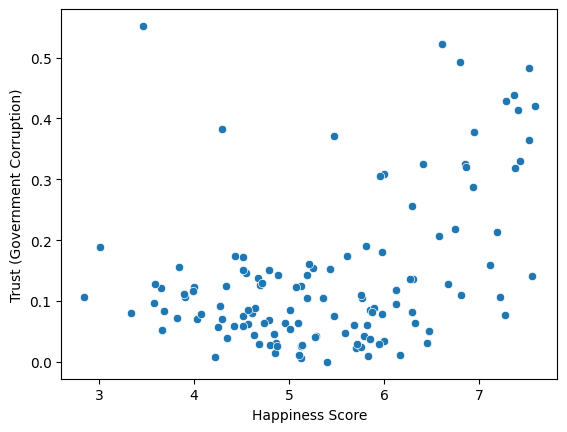

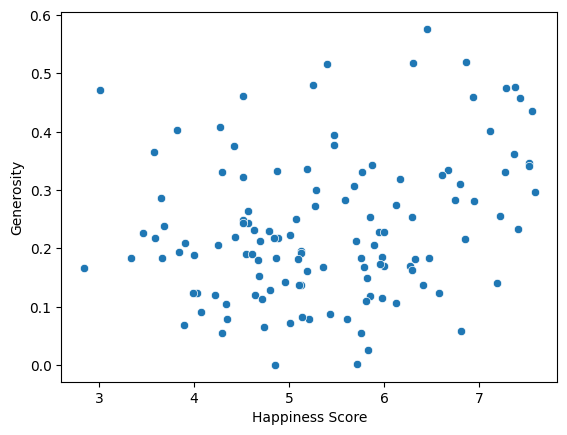

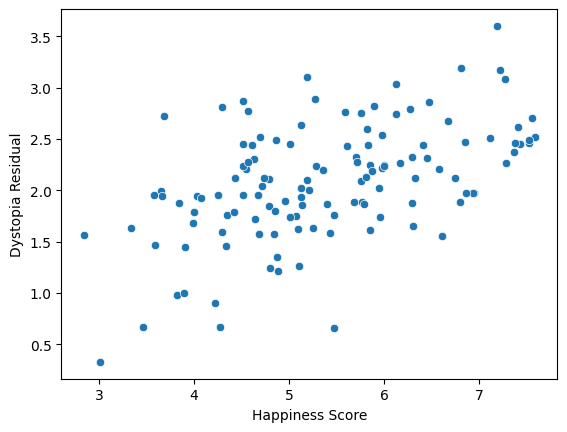

In [129]:
for i in train_set.columns:
  sns.scatterplot(x='Happiness Score', y=i, data=train_set)
  plt.show()

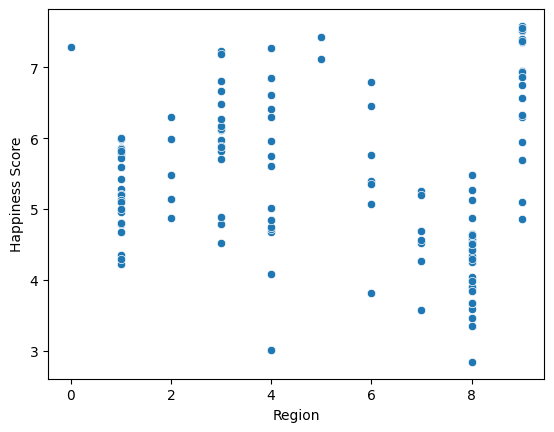

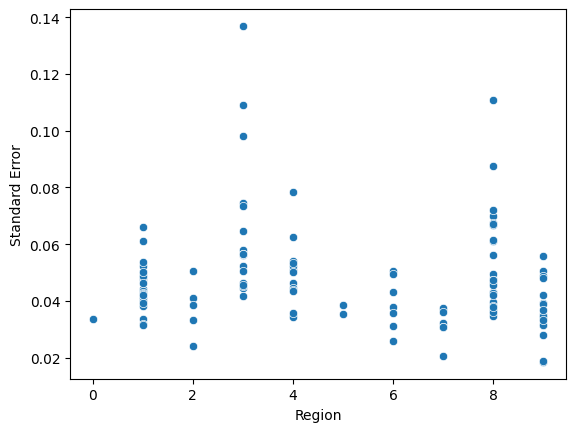

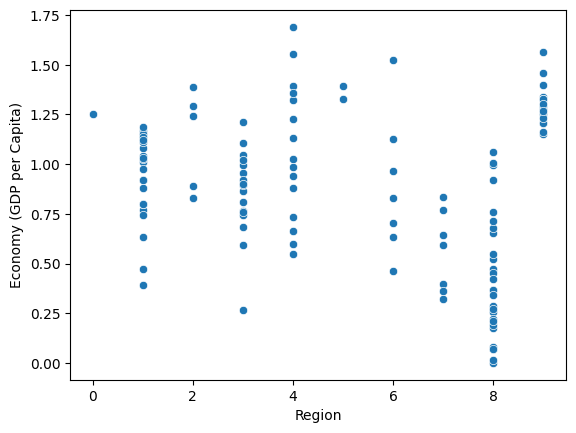

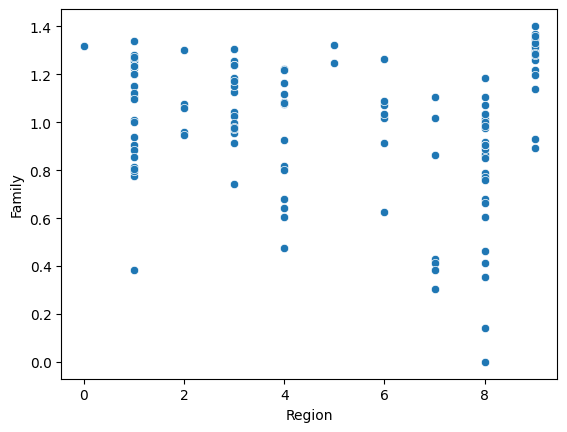

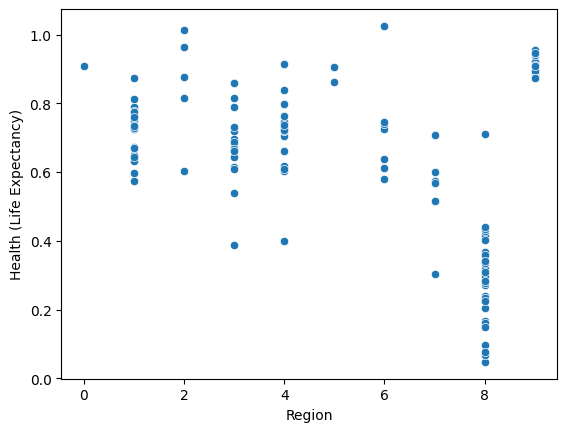

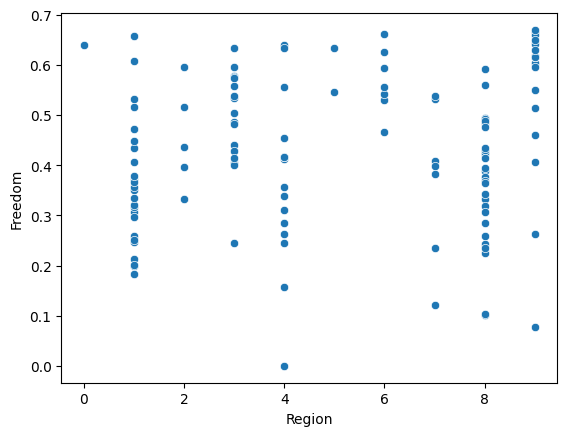

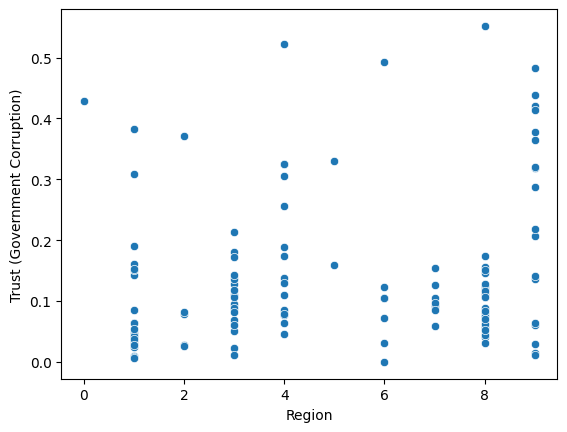

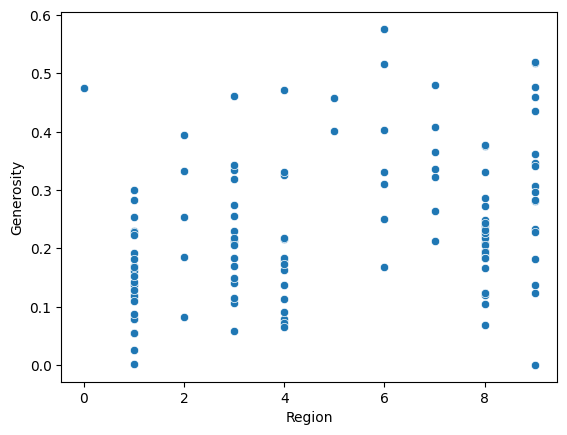

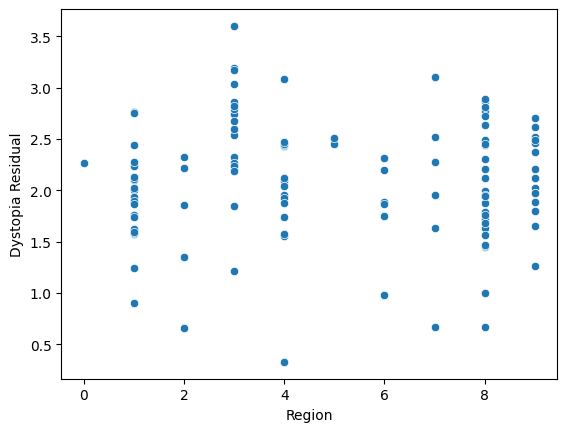

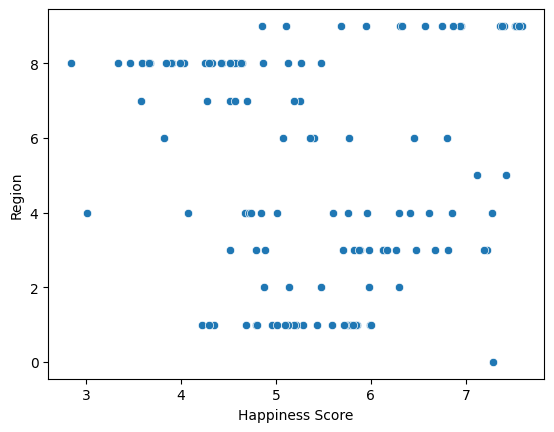

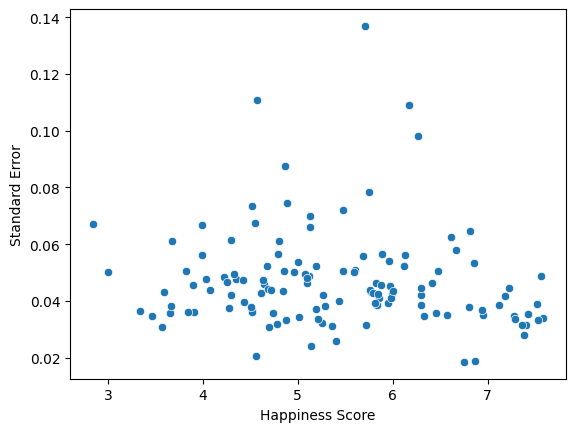

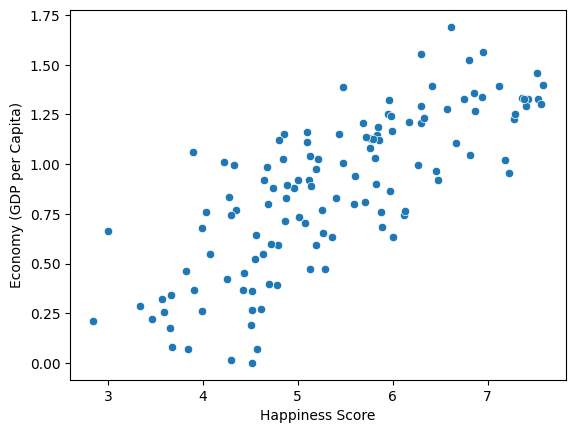

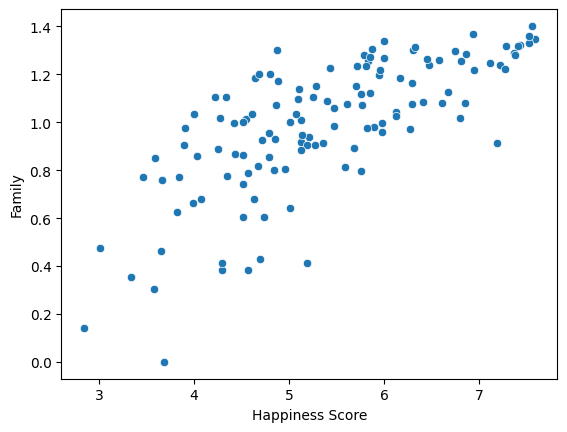

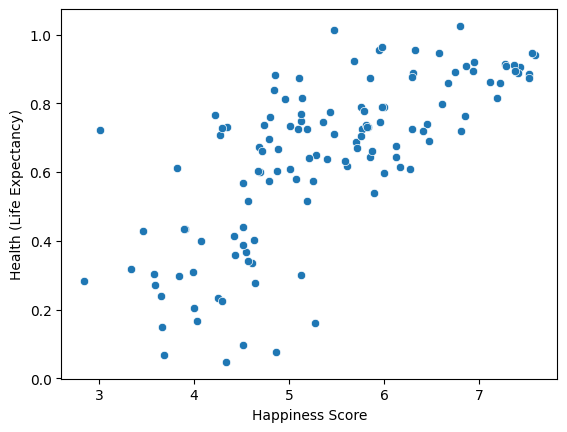

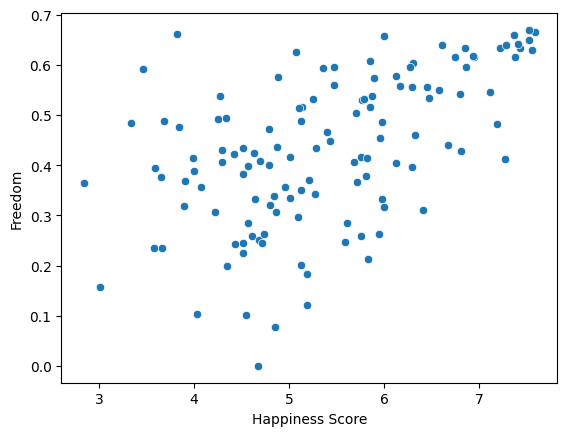

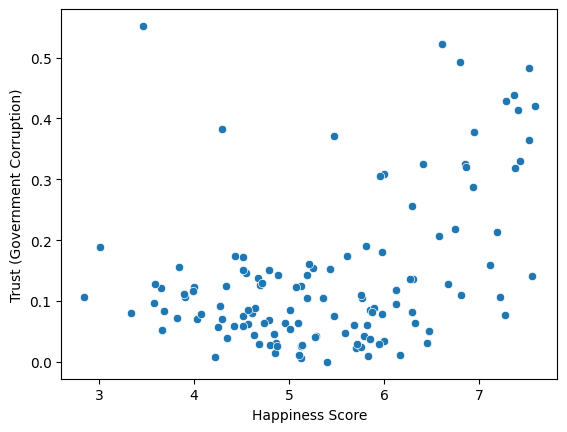

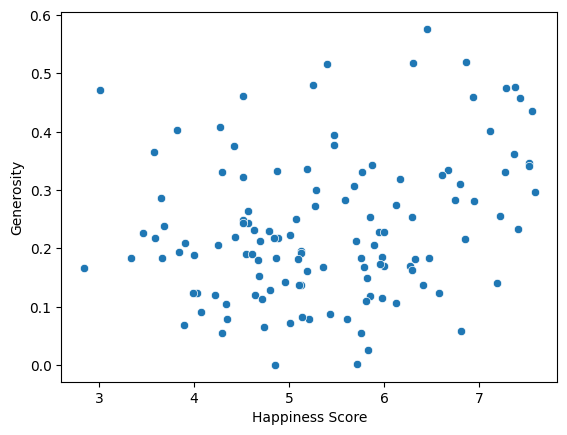

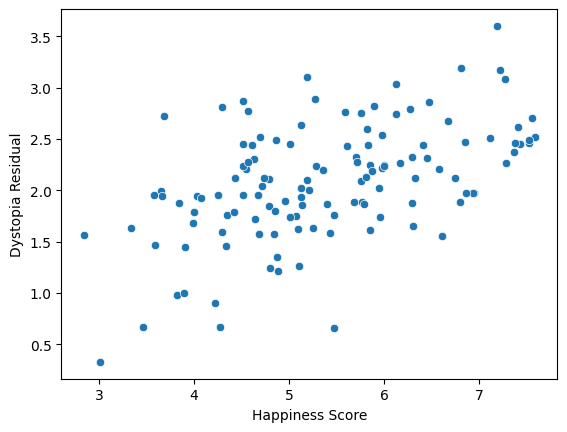

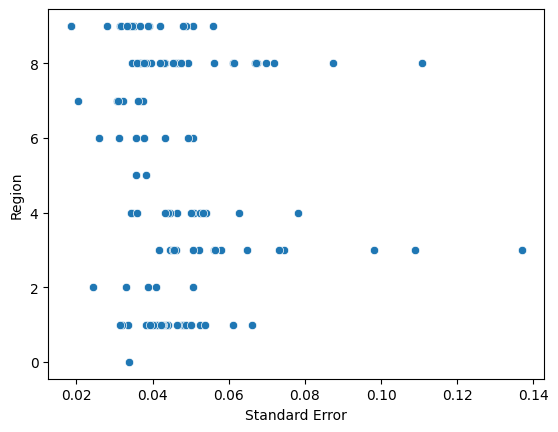

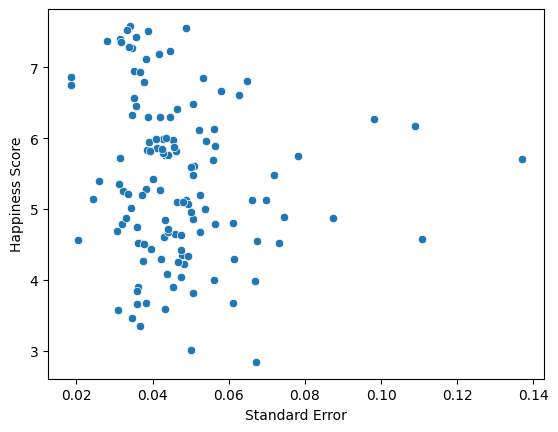

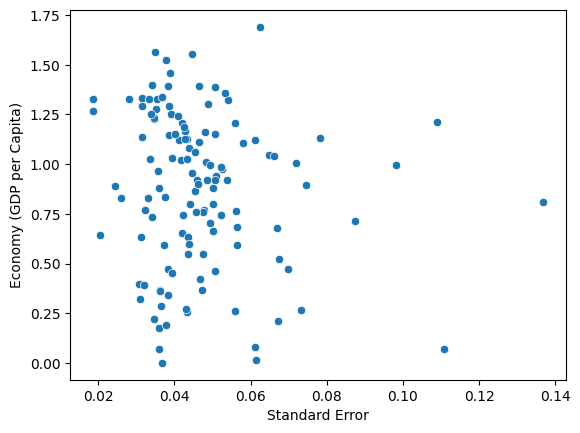

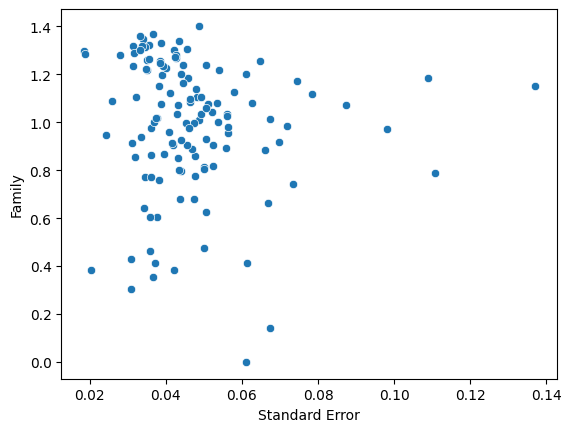

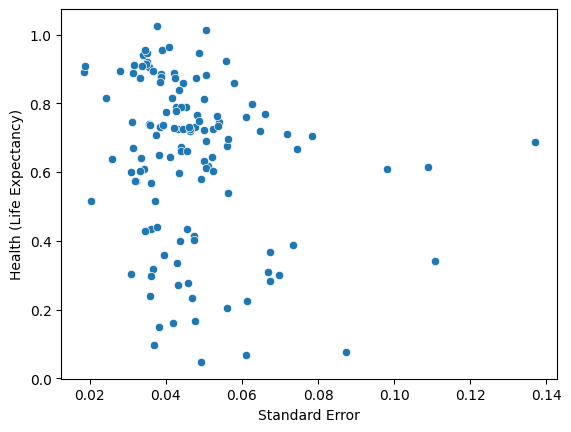

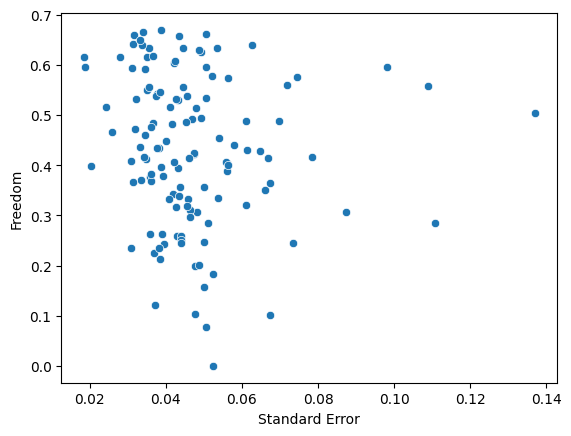

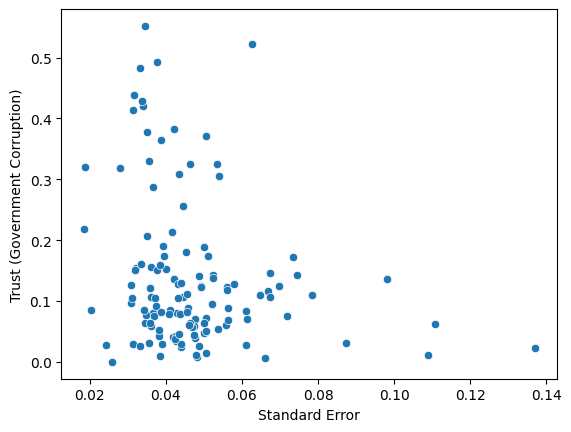

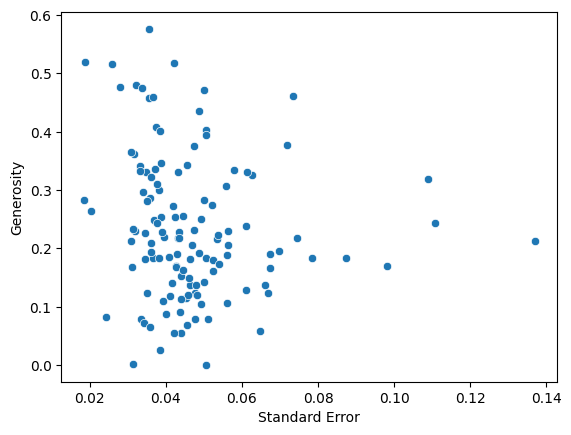

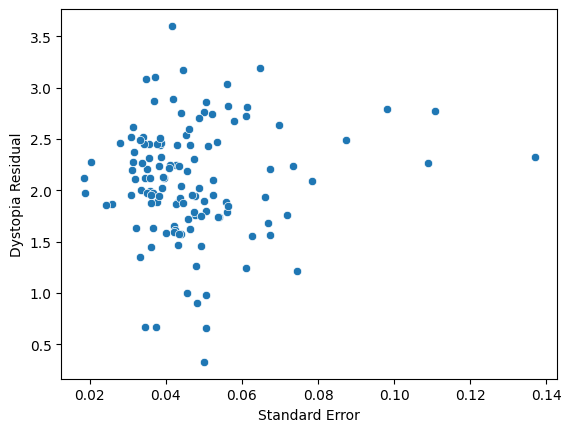

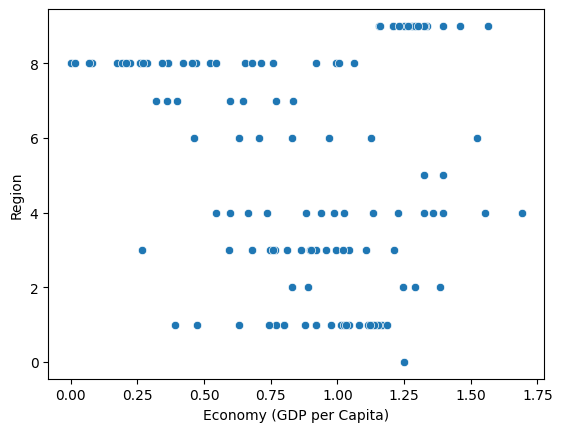

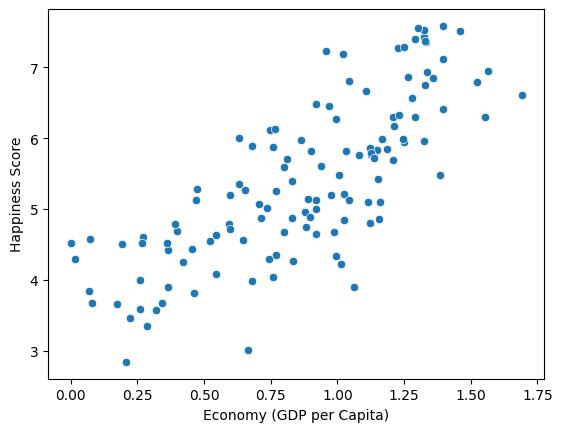

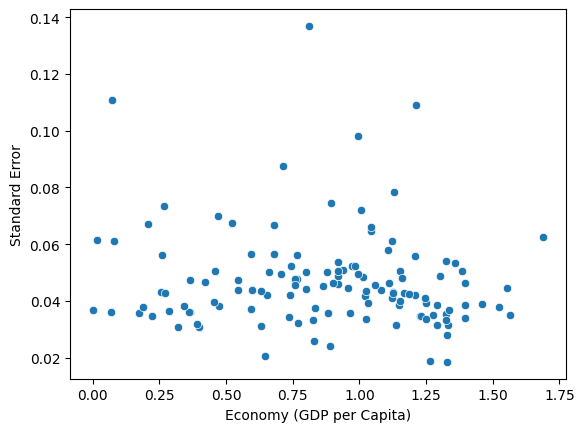

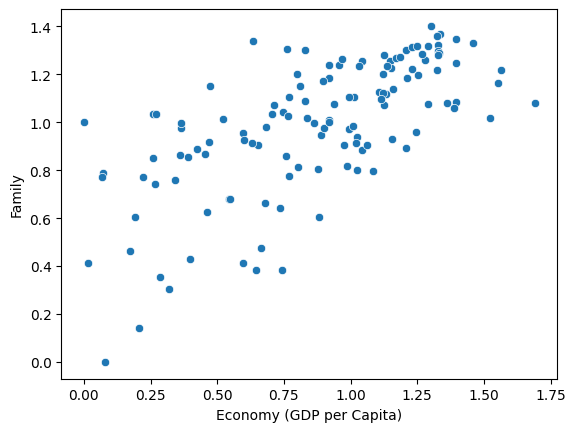

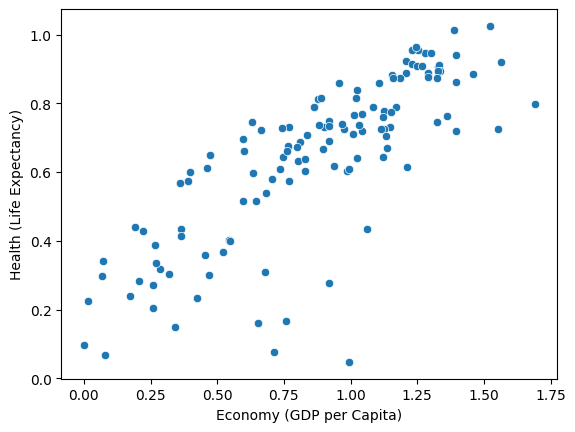

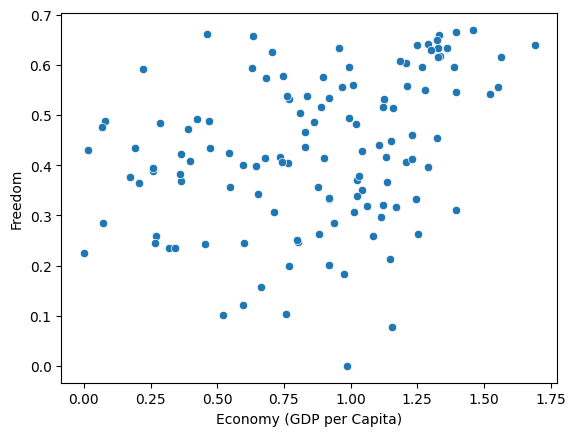

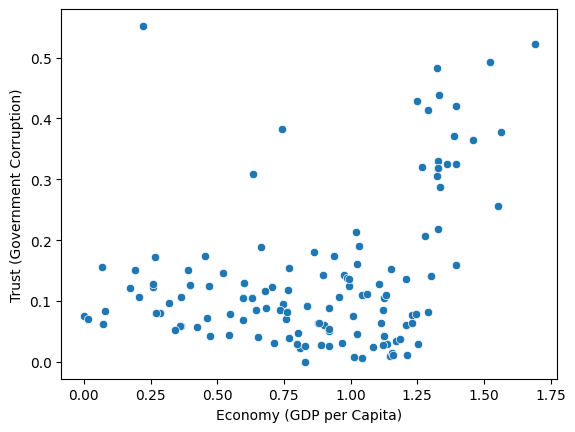

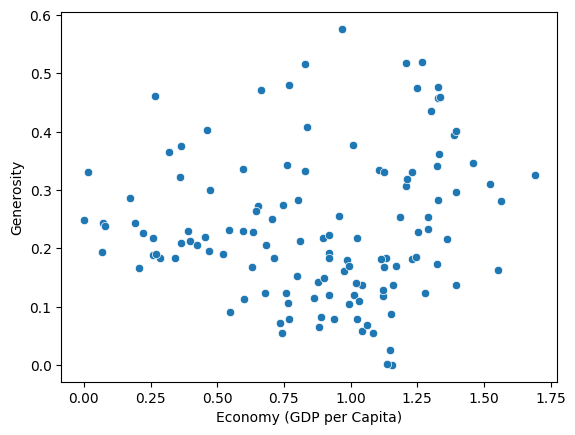

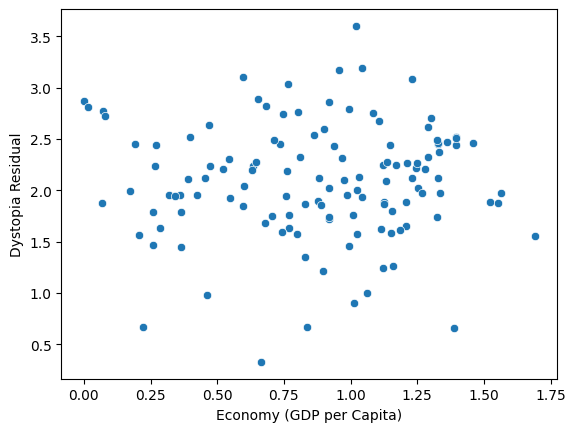

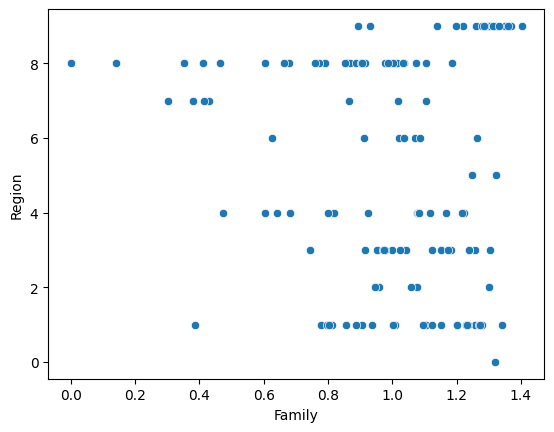

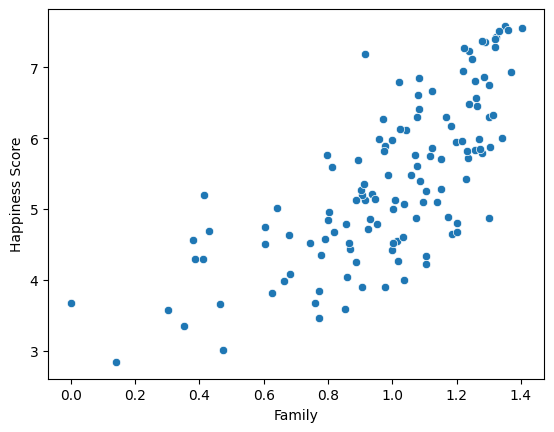

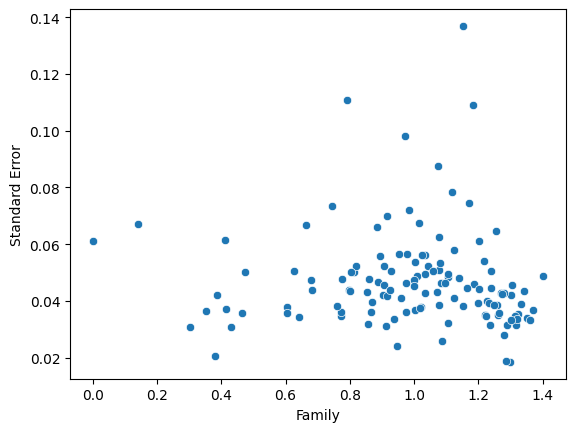

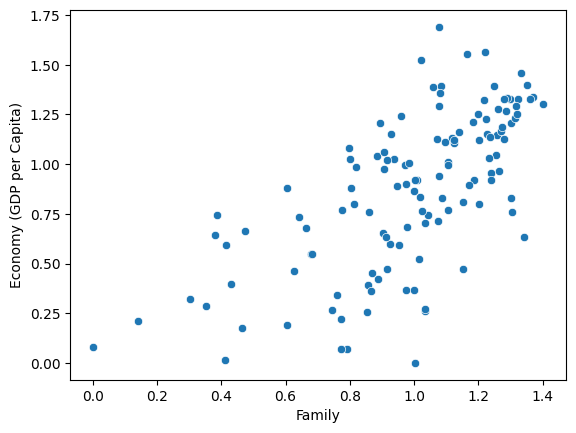

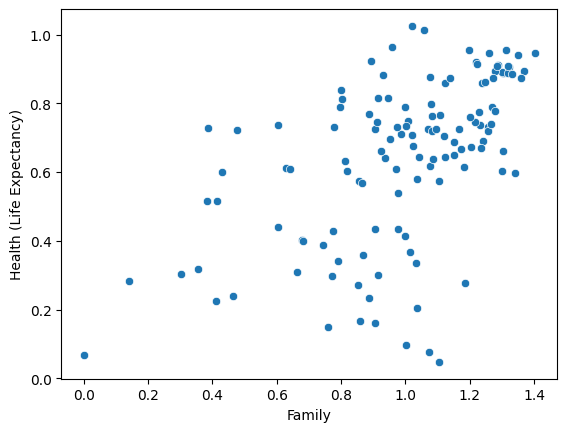

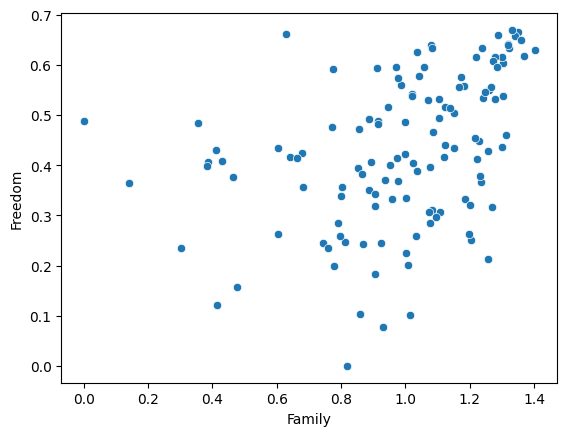

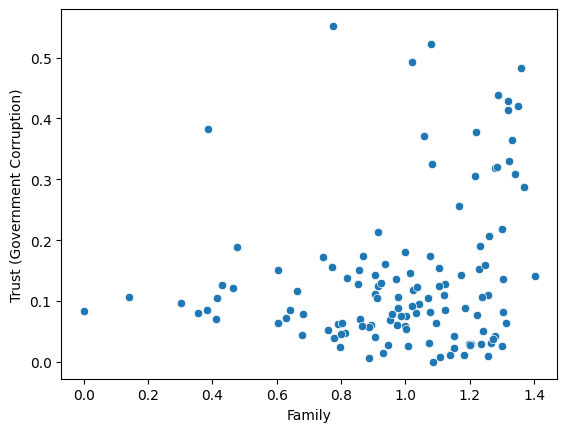

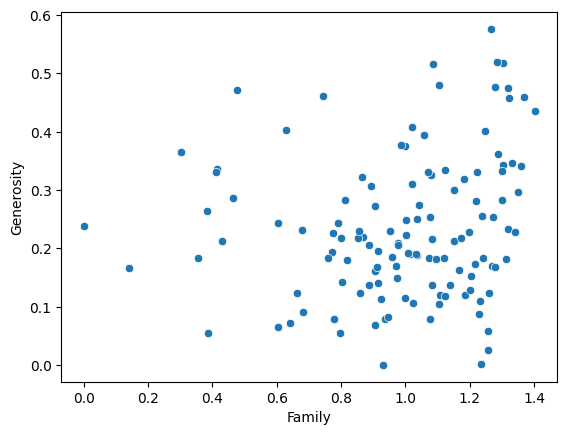

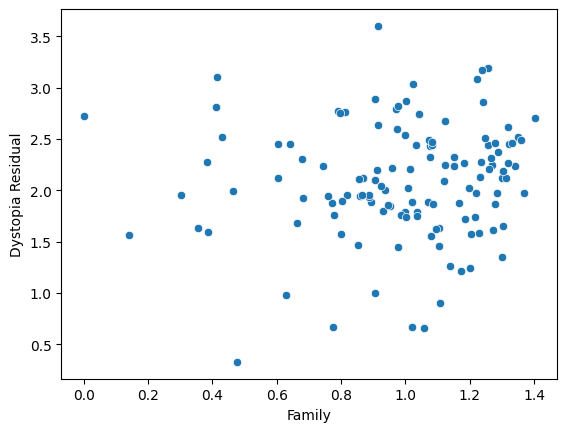

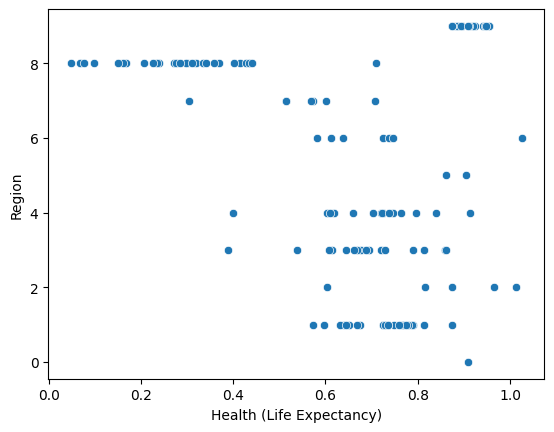

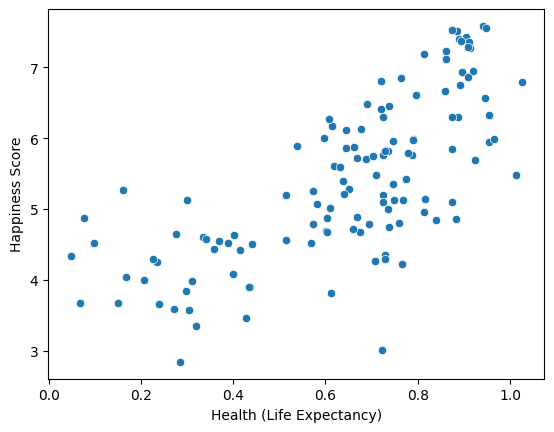

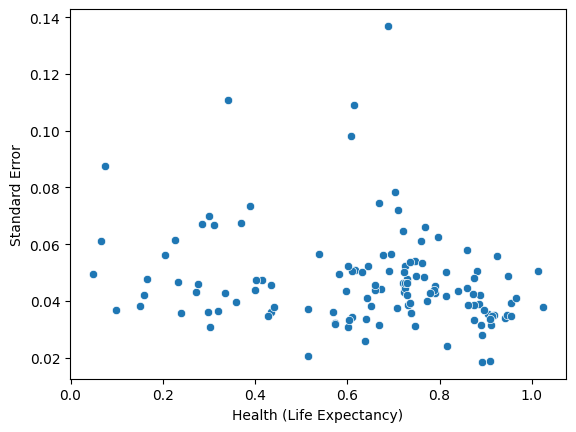

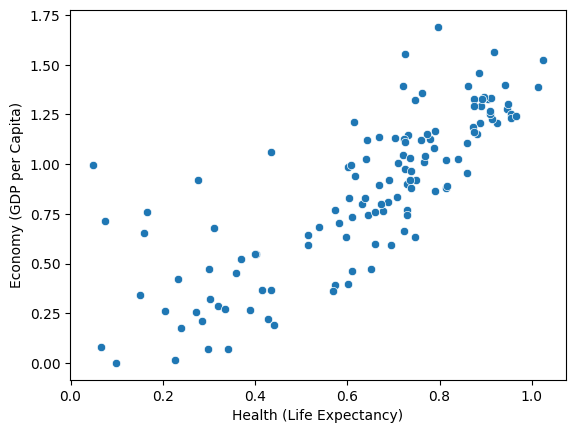

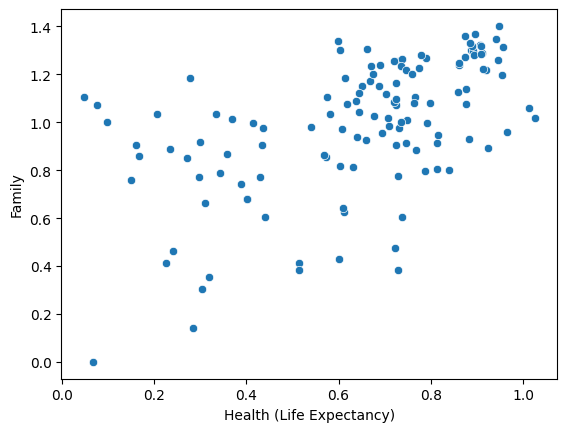

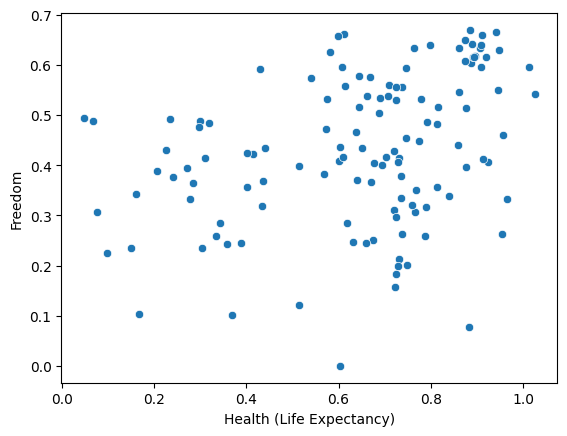

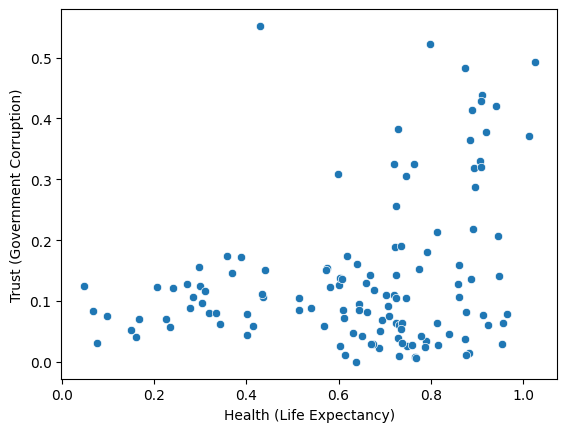

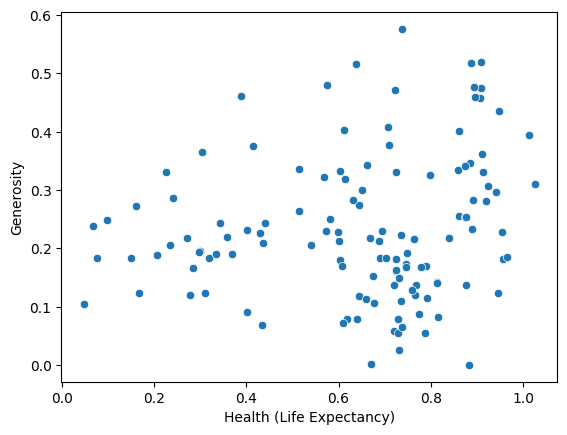

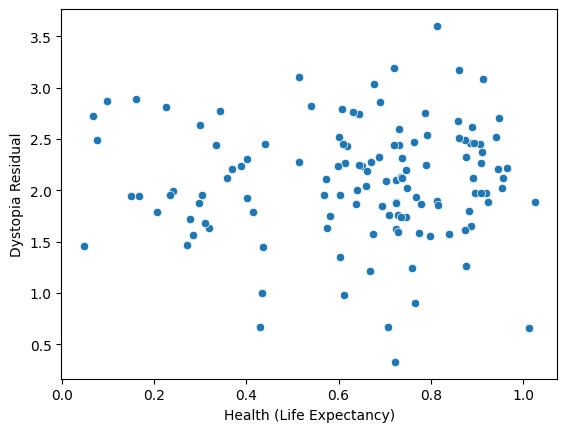

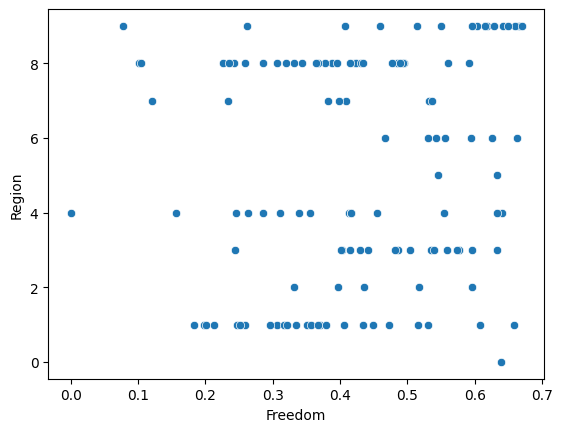

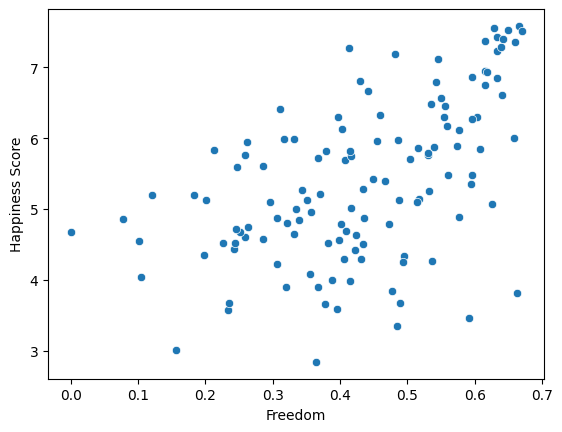

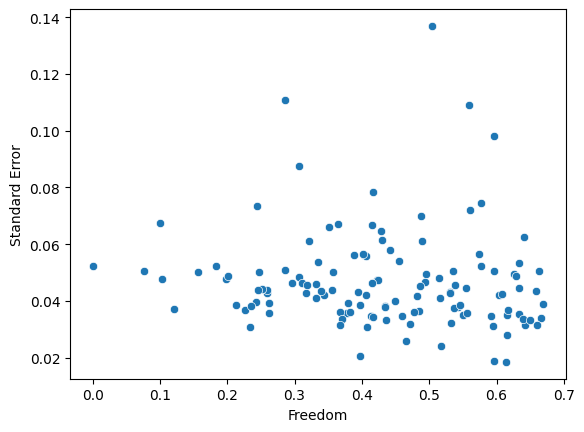

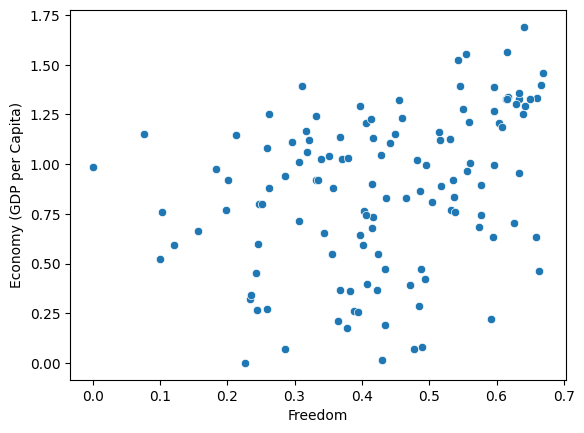

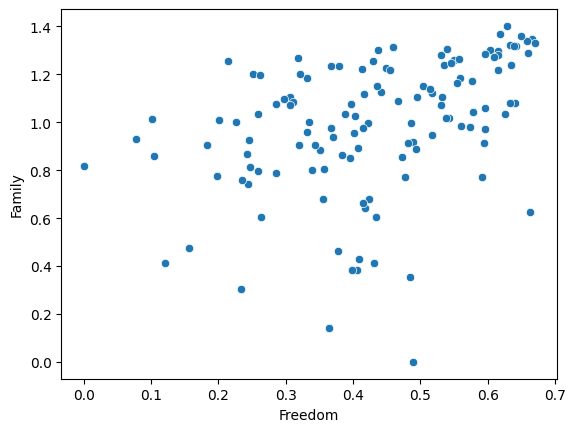

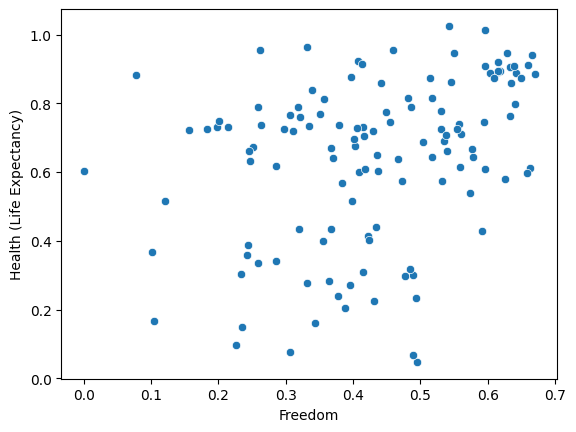

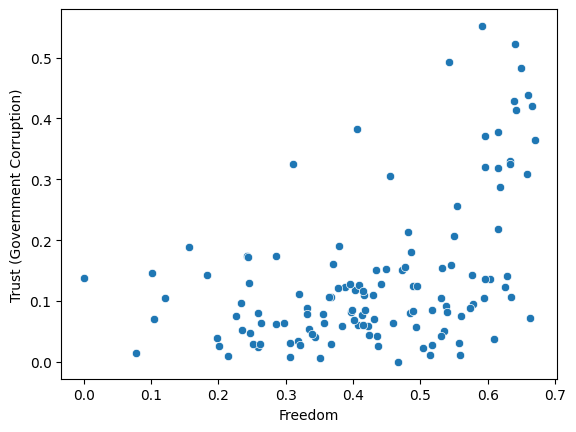

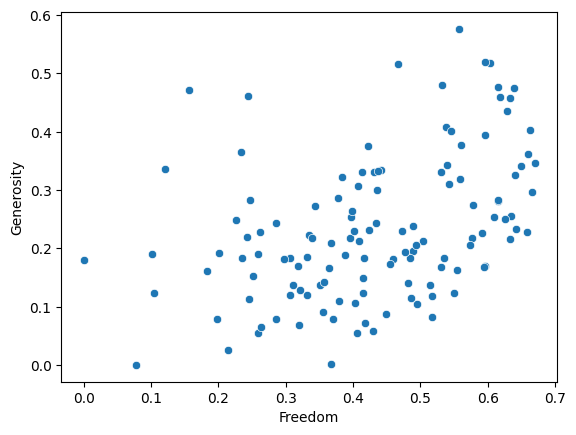

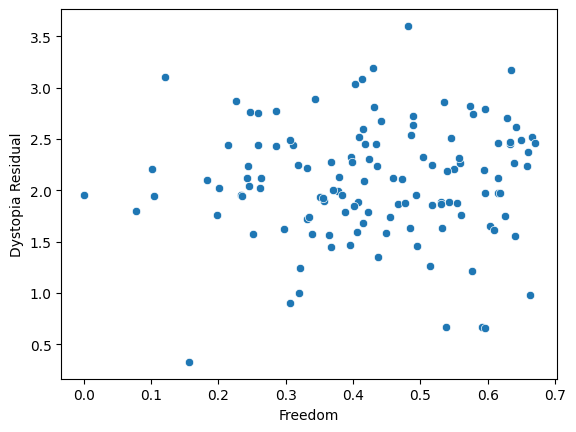

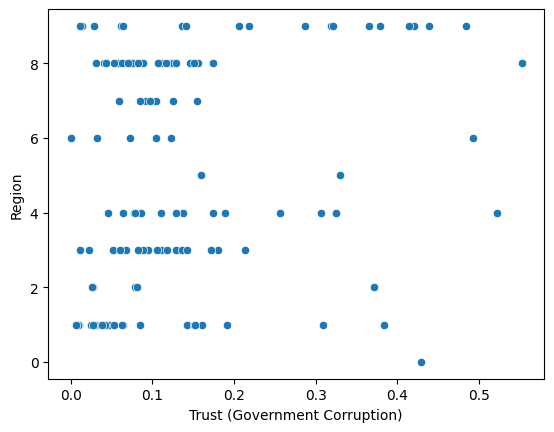

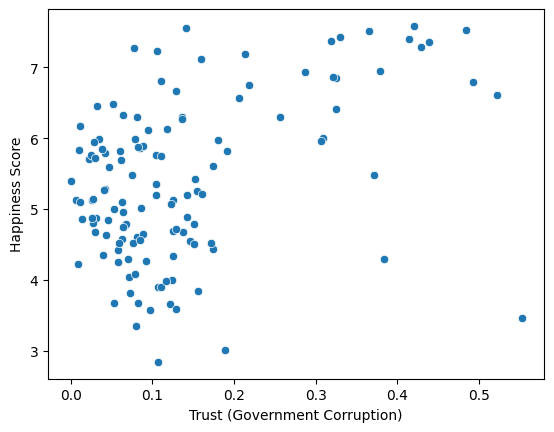

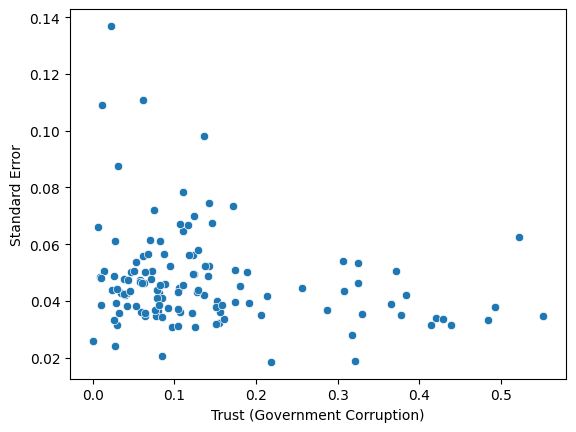

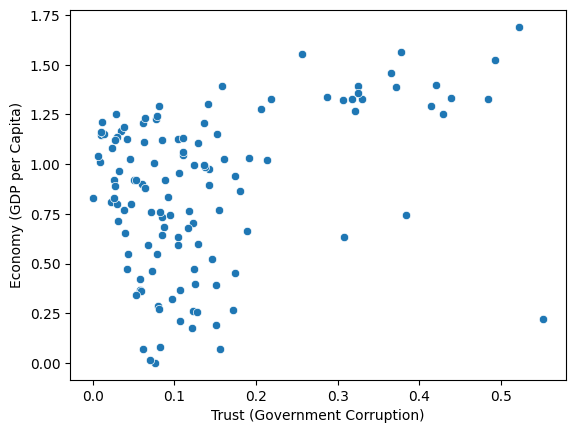

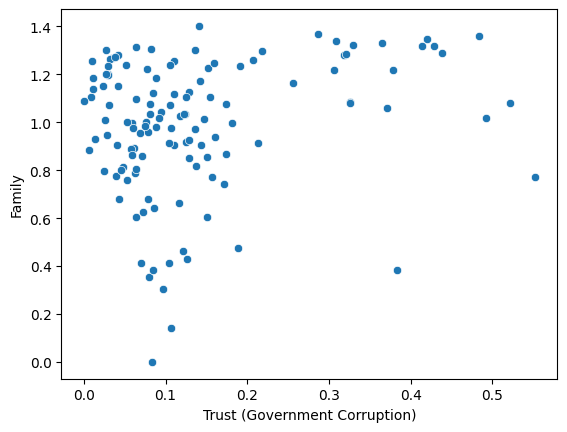

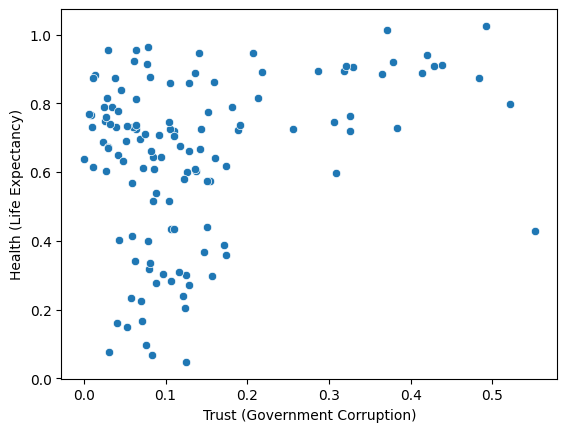

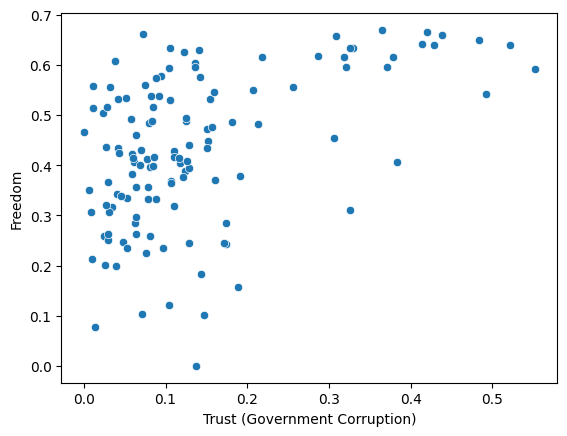

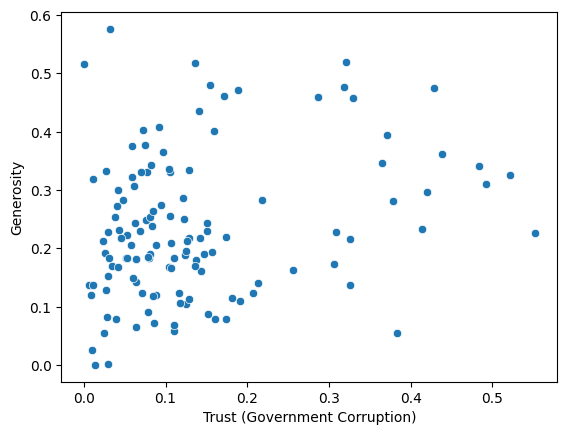

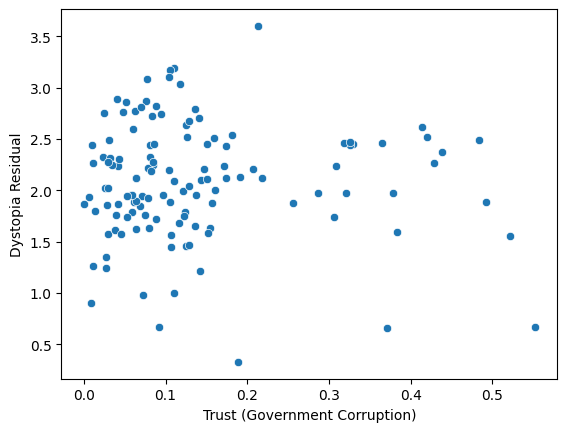

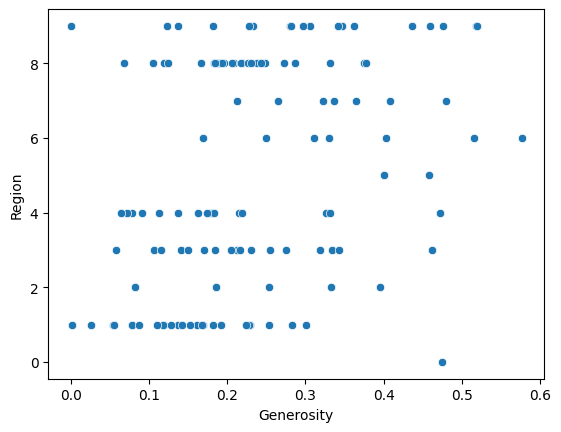

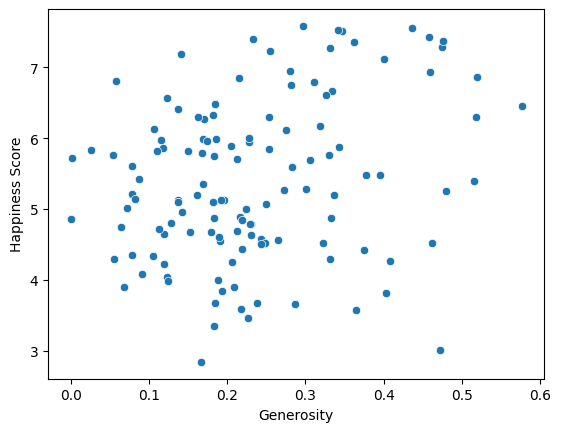

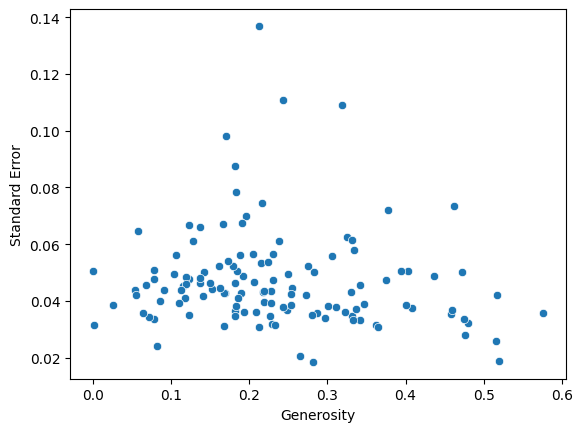

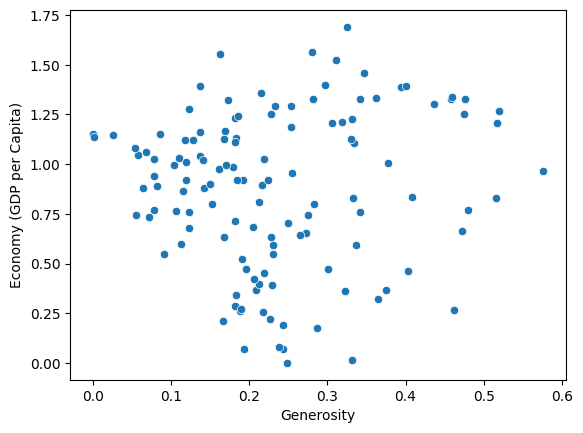

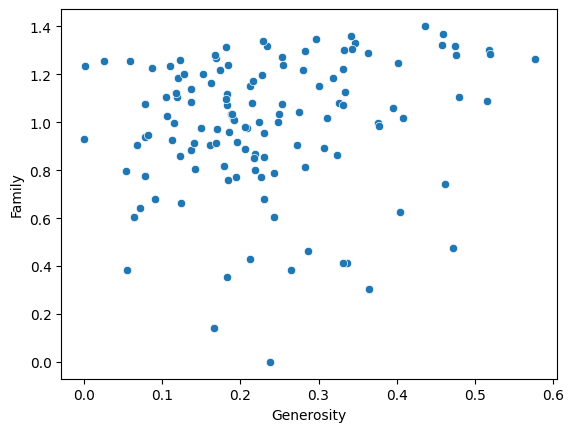

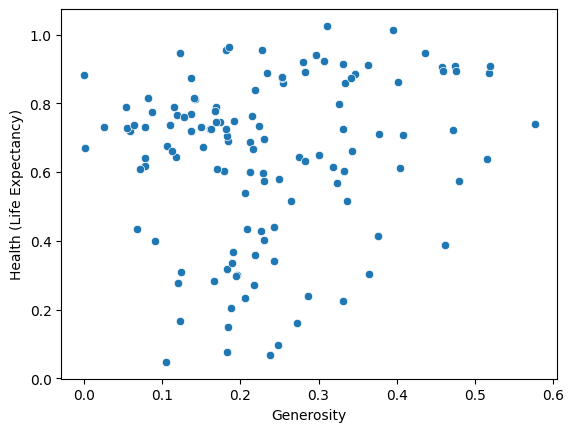

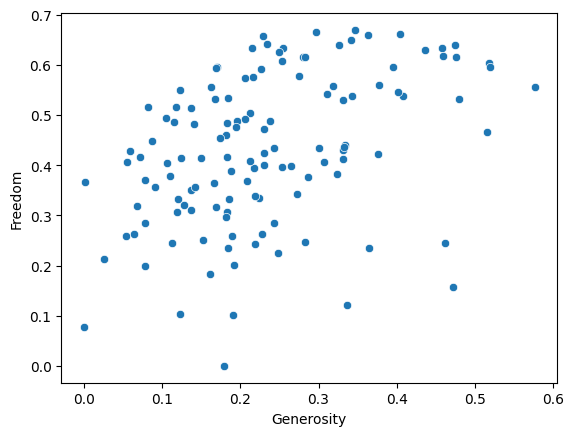

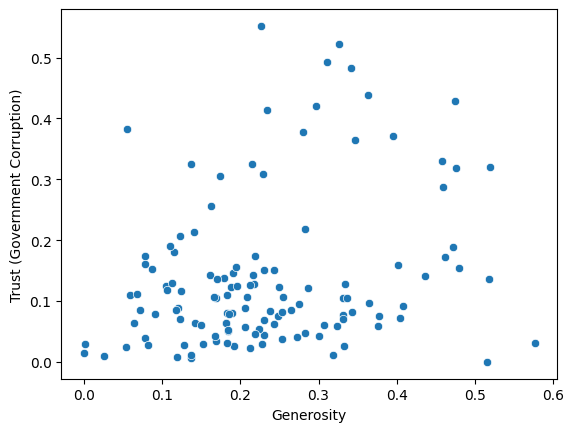

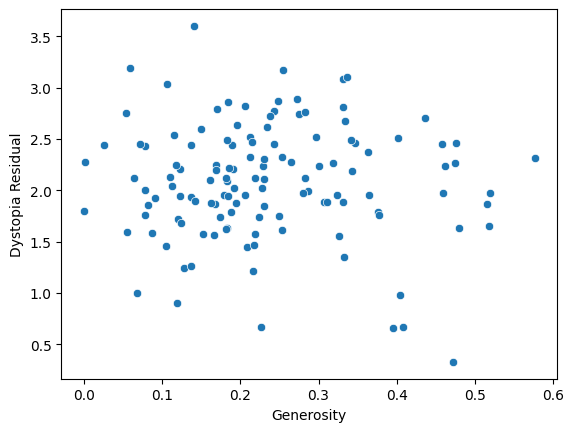

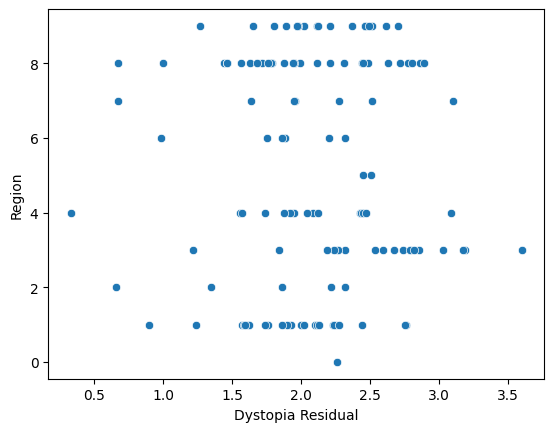

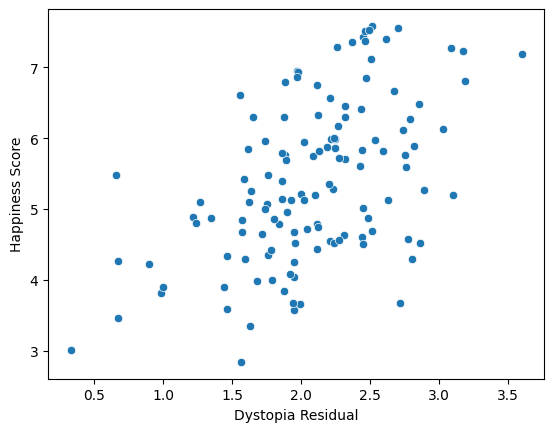

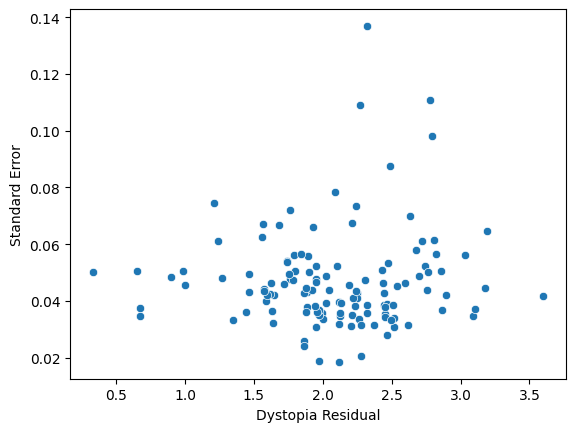

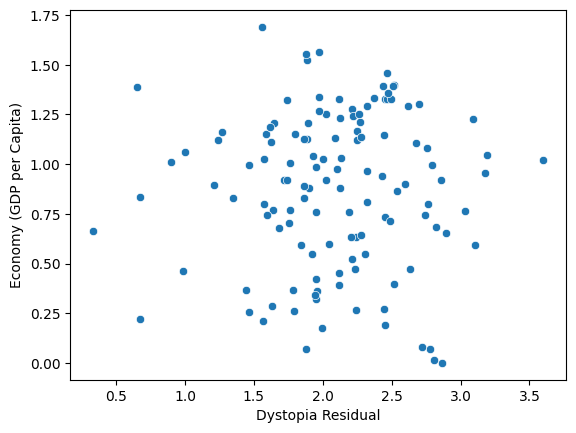

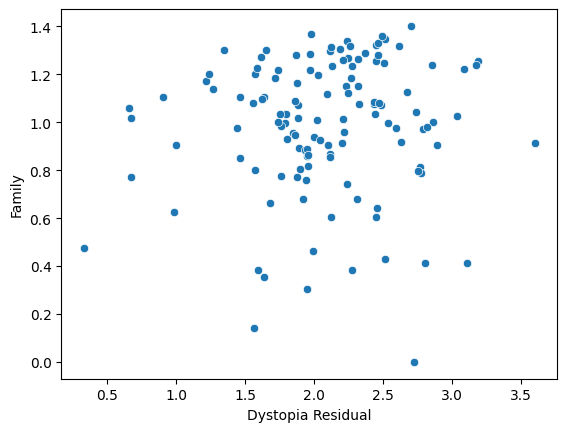

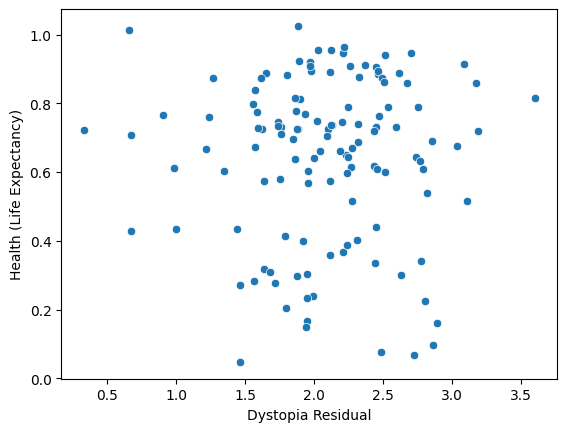

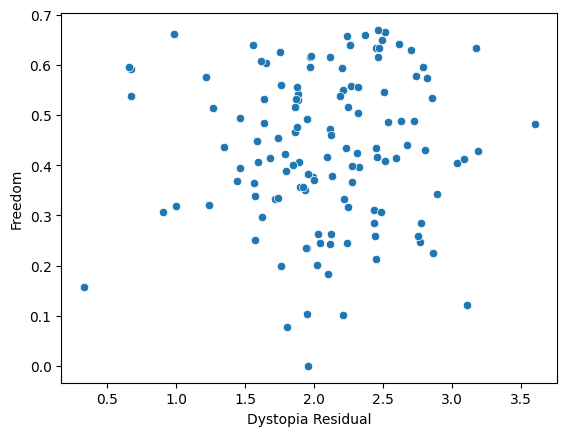

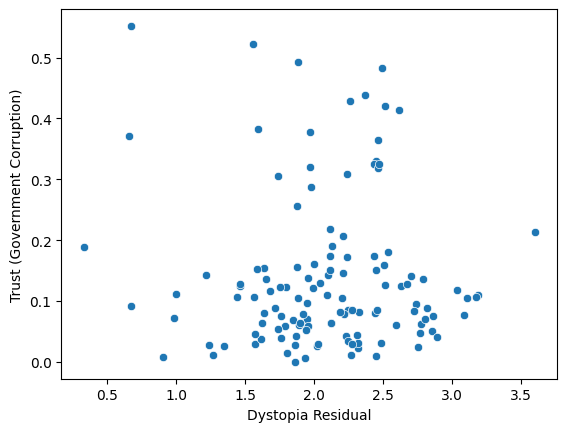

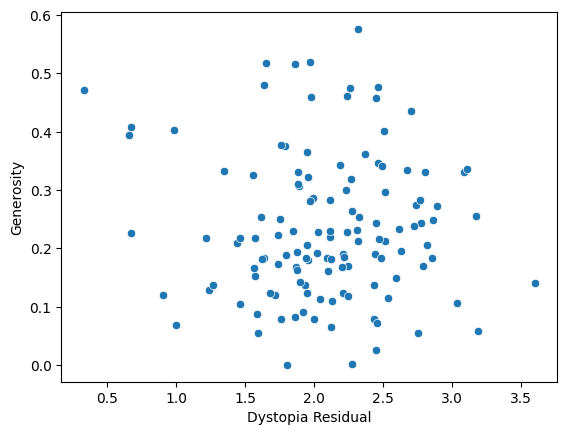

In [130]:
for i in train_set.columns:
  for j in train_set.columns:
    if i!=j:
      sns.scatterplot(x=i, y=j, data=train_set)
      plt.show()

### Correlación

In [95]:
train_set.corr()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.094679,-0.120431,-0.190066,-0.127670,-0.301693,0.140755,0.188176,0.303820,-0.011977
Happiness Score,-0.094679,1.000000,-0.115540,0.773716,0.726300,0.720769,0.536769,0.422880,0.264530,0.514345
Standard Error,-0.120431,-0.115540,1.000000,-0.114762,-0.066710,-0.214227,-0.094492,-0.219745,-0.122717,0.072312
Economy (GDP per Capita),-0.190066,0.773716,-0.114762,1.000000,0.666345,0.798280,0.333782,0.358642,0.063624,0.007957
Family,-0.127670,0.726300,-0.066710,0.666345,1.000000,0.542188,0.403841,0.208957,0.157986,0.081470
Health (Life Expectancy),-0.301693,0.720769,-0.214227,0.798280,0.542188,1.000000,0.348043,0.295572,0.163448,0.006451
Freedom,0.140755,0.536769,-0.094492,0.333782,0.403841,0.348043,1.000000,0.477436,0.415072,0.036067
Trust (Government Corruption),0.188176,0.422880,-0.219745,0.358642,0.208957,0.295572,0.477436,1.000000,0.268137,-0.034543
Generosity,0.303820,0.264530,-0.122717,0.063624,0.157986,0.163448,0.415072,0.268137,1.000000,-0.048728
Dystopia Residual,-0.011977,0.514345,0.072312,0.007957,0.081470,0.006451,0.036067,-0.034543,-0.048728,1.000000


<Axes: >

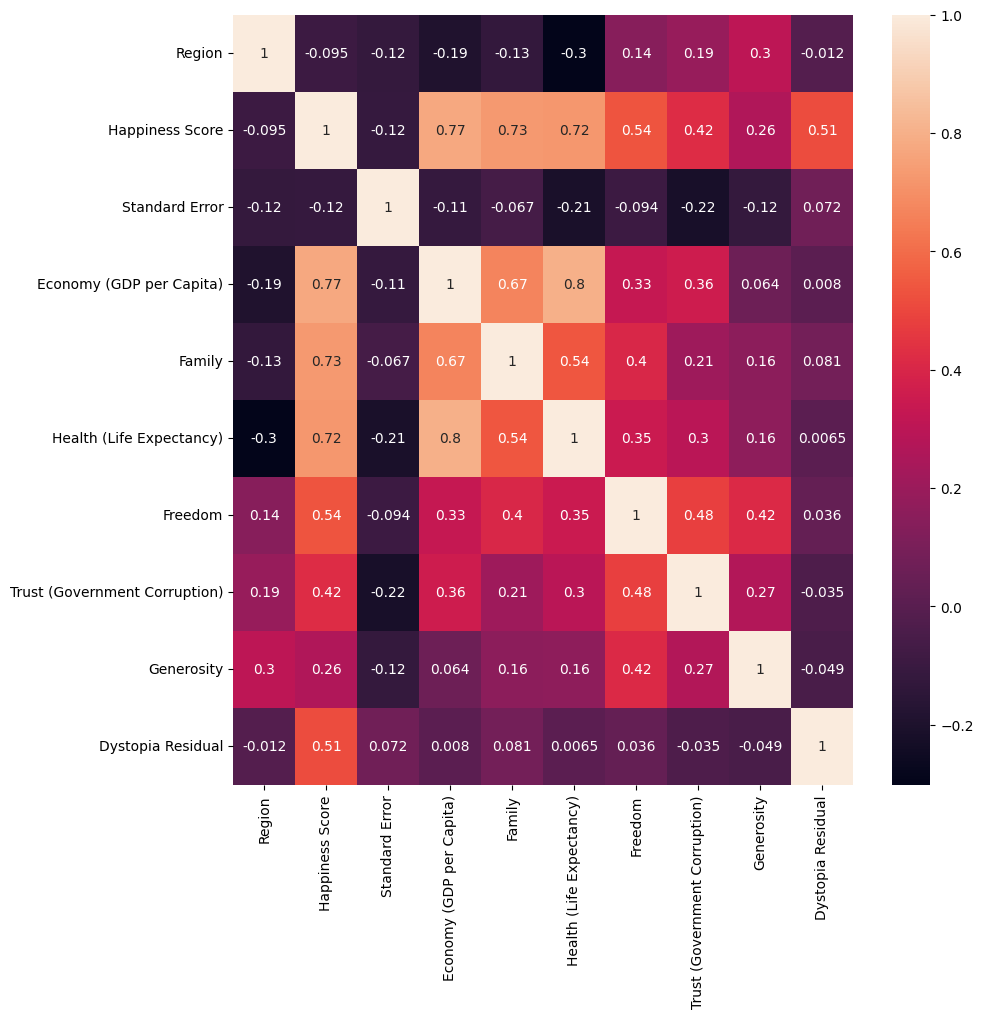

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(), annot=True)

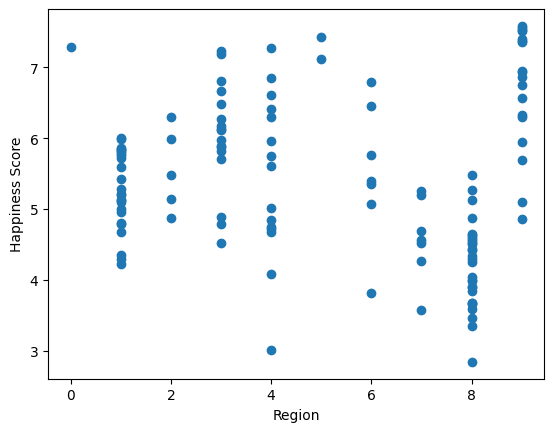

In [131]:
plt.scatter(train_set['Region'], train_set['Happiness Score'])
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

### Sesgo

In [136]:
train_set.skew()

Region                          -0.092160
Happiness Score                  0.125294
Standard Error                   0.904405
Economy (GDP per Capita)        -0.359034
Family                          -1.060088
Health (Life Expectancy)        -0.727957
Freedom                         -0.395631
Trust (Government Corruption)    0.176941
Generosity                       0.596394
Dystopia Residual               -0.367630
dtype: float64

In [137]:
train_set['Standard Error'] = np.power(train_set['Standard Error'], 1/4)
test_set['Standard Error'] = np.power(test_set['Standard Error'], 1/4)

In [138]:
train_set['Trust (Government Corruption)'] = np.power(train_set['Trust (Government Corruption)'], 1/3)
test_set['Trust (Government Corruption)'] = np.power(test_set['Trust (Government Corruption)'], 1/3)

In [139]:
train_set.skew()

Region                          -0.092160
Happiness Score                  0.125294
Standard Error                   0.588310
Economy (GDP per Capita)        -0.359034
Family                          -1.060088
Health (Life Expectancy)        -0.727957
Freedom                         -0.395631
Trust (Government Corruption)   -3.218365
Generosity                       0.596394
Dystopia Residual               -0.367630
dtype: float64

### Se dividen los datos en X_train, X_test, y_train, y_test

In [140]:
X_train = train_set.drop(['Happiness Score'], axis=1)
y_train = train_set['Happiness Score']

X_test = test_set.drop(['Happiness Score'], axis=1)
y_test = test_set['Happiness Score']

In [141]:
X_train.shape

(126, 9)

In [142]:
X_test.shape

(32, 9)

In [143]:
y_train.shape

(126,)

In [144]:
y_test.shape

(32,)

### Se escalan los datos

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Se modelan los algoritmos

#### Regresión Lineal

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.048249602961670884
Mean Squared Error: 0.004004114021875134
Root Mean Squared Error: 0.06327806904350933
R-squared: 0.9971777183235871


#### Árbol de desición

In [147]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 4, random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.4091003640232973
Mean Squared Error: 0.24097372359597677
Root Mean Squared Error: 0.4908907450706081
R-squared: 0.8301507597220181
